# lets do somethimg fun 
## what we are going to cover is using some sklearn ml modles to predict if the customer is about to churn or not. The steps would be as follows:
  * ingesting data
  * preparing data
  * explorarity of data
  * training model
  * save model 

In [77]:
#lets bring the libraries and  models 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn 


In [2]:
# lets download the data
df=pd.read_csv("/workspaces/MLOps-tensorFlow/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
string=list(df.dtypes[df.dtypes=='object'].index)
string

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [5]:
for col in string:
    df[col]=df[col].str.replace(' ','_').str.lower()

In [6]:
df.columns=df.columns.str.replace(' ','_').str.lower()

In [7]:

num=list(df.dtypes[df.dtypes!='object'].index)
num


['seniorcitizen', 'tenure', 'monthlycharges']

In [8]:
df.totalcharges=pd.to_numeric(df.totalcharges,errors='coerce')

In [9]:
df.totalcharge=df['totalcharges'].fillna(0)

/tmp/ipykernel_5800/4053582111.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.totalcharge=df['totalcharges'].fillna(0)


In [10]:
df.churn=(df.churn=='yes').astype(int)

# Creatin train-test and validation split for our data

In [15]:
#lets calls our modules and libraraies 
from sklearn.model_selection import train_test_split

In [16]:
df_fulltrain,df_test=train_test_split(df,test_size=.2,random_state=42,shuffle=True)

In [17]:
df_train,df_val=train_test_split(df_fulltrain,test_size=.25,random_state=42)

In [18]:
len(df_train),len(df_test),len(df_val)

(4225, 1409, 1409)

In [19]:
df_train=df_train.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)

In [20]:
y_train=df_train['churn']
y_val=df_val['churn']
y_test=df_test['churn']

In [21]:
del df_train['churn'] 
del df_val['churn'] 
del df_test['churn'] 

# EDA

In [22]:
# lets investigate our churn features
global_churn_mean=df_fulltrain.churn.mean()

In [23]:
round(global_churn_mean,2)

np.float64(0.27)

In [24]:
cat=['gender', 'seniorcitizen', 'partner', 'dependents',
        'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [25]:
num=['seniorcitizen', 'tenure', 'monthlycharges']

In [26]:
df_fulltrain[cat].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

# Feature engineering for some columns 


In [27]:
#lets first look at the some features and find the churn mean and compaire with global churn whai is .27
df_fulltrain[df_fulltrain.gender=='female'].churn.mean()

np.float64(0.2708409173643975)

In [28]:
Has_partner=df_fulltrain[df_fulltrain.partner=='yes'].churn.mean()
No_partner=df_fulltrain[df_fulltrain.partner=='no'].churn.mean()

In [29]:
Has_partner,No_partner

(np.float64(0.20073260073260074), np.float64(0.32644628099173556))

## Risk Ratio

In [30]:
float(Has_partner/global_churn_mean) ,float(No_partner/global_churn_mean)

(0.7559675618499149, 1.2294106598311754)

## lets do it in some other way 

In [32]:
df_fulltrain.groupby(by=['gender']).churn.agg(['mean','count'])

,mean,count
gender,,
female,0.270841,2747
male,0.260478,2887


In [33]:
df_fulltrain.groupby(by=['partner']).churn.agg(['mean','count'])

,mean,count
partner,,
no,0.326446,2904
yes,0.200733,2730


## lets look at the funny function to see the if the features are important or not 

In [34]:
from sklearn.metrics import mutual_info_score

In [35]:
gender_parameters=round(float(mutual_info_score(df_fulltrain.churn,df_fulltrain.gender)),4)

In [36]:
partner_parameters=round(float(mutual_info_score(df_fulltrain.churn,df_fulltrain.partner)),4)

In [37]:
contract_parameters=round(float(mutual_info_score(df_fulltrain.churn,df_fulltrain.contract)),4)

In [38]:
contract_parameters

0.0967

In [39]:
cat

['gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod']

In [40]:
x=[]
for col in cat:
        parameters=round(float(mutual_info_score(df_fulltrain.churn,df_fulltrain[col])),4)
        x.append(parameters)
list(x)

[0.0001,
 0.0101,
 0.0102,
 0.0141,
 0.0,
 0.0007,
 0.0533,
 0.0634,
 0.0454,
 0.042,
 0.0609,
 0.0308,
 0.0307,
 0.0967,
 0.0191,
 0.0429]

## lets do same process for nuemeric features 

In [41]:
df_fulltrain[num].corrwith(df_fulltrain.churn)

seniorcitizen     0.147078
tenure           -0.344925
monthlycharges    0.188574
dtype: float64

## Now its time to do machin learning model . The first step is to convert those categorical features using ** ON_Hot** encoder to numbers and leave the nuemeric number as it is

In [42]:
from sklearn.feature_extraction import DictVectorizer

In [43]:
dv=DictVectorizer(sparse=False)

In [44]:
train_dict=df_train[cat+num].to_dict(orient='records')

/tmp/ipykernel_5800/3934732184.py:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  train_dict=df_train[cat+num].to_dict(orient='records')


In [45]:
x_train=dv.fit_transform(train_dict)

In [46]:
val_dict=df_val[cat+num].to_dict(orient='records')

/tmp/ipykernel_5800/2951016793.py:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  val_dict=df_val[cat+num].to_dict(orient='records')


In [47]:
x_val=dv.transform(val_dict)

In [48]:
#lets call the model 
from sklearn.linear_model import LogisticRegression

In [49]:
model=LogisticRegression(random_state=42)

In [50]:
model.fit(x_train,y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [51]:
model.predict_proba(x_train)

array([[0.8415434 , 0.1584566 ],
       [0.87561747, 0.12438253],
       [0.77597792, 0.22402208],
       ...,
       [0.80072549, 0.19927451],
       [0.98783971, 0.01216029],
       [0.87569635, 0.12430365]])

In [52]:
y_pred=model.predict(x_val)

In [53]:
churn_decision =y_pred>0

## lets look at the diffrent thresholds

In [54]:
t=np.linspace(0,1,21)

In [55]:
#lets look at some metrics 
from sklearn.metrics import accuracy_score
    
    

In [56]:
accuracy_score(y_val,y_pred)

0.8026969481902059

In [57]:
from sklearn.metrics import confusion_matrix

In [58]:
confusion_matrix(y_val,y_pred)

array([[931,  99],
       [179, 200]])

In [59]:
tn=931
tp=200
fn=179
fp=99
precision=tp/(tp+fp)
recall=tp/(tp+fn)

In [60]:
 recall

0.5277044854881267

# lets draw the ROC curve and see if the model is good or not 

In [65]:
from sklearn.metrics import roc_curve

In [66]:
tpr,fnr,thresholds=roc_curve(y_val,y_pred)

Text(0, 0.5, 'tpr')

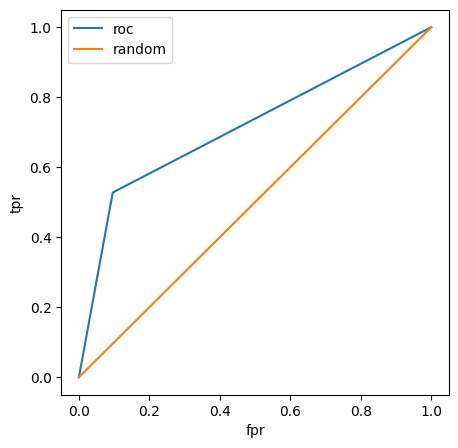

In [69]:
plt.figure(figsize=(5,5))

plt.plot(tpr,fnr, label='roc')
plt.plot([0,1],[0,1],label='random')

plt.legend()
plt.xlabel('fpr')
plt.ylabel('tpr')

## Model Deployment

### Now its time to deploy our modle to productions . when we talk about deployment, literally we are talking about how stackholder can have access to our model and how can model deploys on server.. lets hands on and do it :
  * we are going to create the flask app to our model. in which customers are going to send a request through api and server using the model retuyrn response 

In [71]:
output=f'model.bin'
output

'model.bin'

In [72]:
import pickle

In [86]:
with open(output,'wb') as f_out:
    pickle.dump((model,dv),f_out)

In [82]:
dv.transform(dict(df.iloc[1]))

array([[ 0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,
         1.  ,  1.  ,  0.  ,  0.  , 56.95,  1.  ,  0.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  1.  ,  0.  ,  1.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,
         0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  , 34.  ]])

In [84]:
dict(df.iloc[1]).str.replace()

{'customerid': '5575-gnvde',
 'gender': 'male',
 'seniorcitizen': np.int64(0),
 'partner': 'no',
 'dependents': 'no',
 'tenure': np.int64(34),
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'dsl',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'no',
 'streamingmovies': 'no',
 'contract': 'one_year',
 'paperlessbilling': 'no',
 'paymentmethod': 'mailed_check',
 'monthlycharges': np.float64(56.95),
 'totalcharges': np.float64(1889.5),
 'churn': np.int64(0)}